<a href="https://colab.research.google.com/github/blackJJW/DL/blob/main/Deep_learning_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR Experiment

In [1]:
import numpy as np

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [3]:
X.shape, y.shape

((4, 2), (4,))

In [4]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression

In [5]:
# Least squares

In [6]:
model_LS = RidgeClassifier()
model_LS.fit(X, y)

RidgeClassifier()

In [7]:
model_LS.predict(X)

array([0, 0, 0, 0])

In [8]:
model_LS.score(X, y)

0.5

In [9]:
# Logistic Regression

In [10]:
model_LR = LogisticRegression()
model_LR.fit(X, y)

LogisticRegression()

In [11]:
model_LR.predict(X)

array([0, 0, 0, 0])

In [12]:
model_LR.score(X, y)

0.5

# DNN

In [13]:
import tensorflow.keras as keras

In [14]:
keras.models

<module 'keras.api._v2.keras.models' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/models/__init__.py'>

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
# 2 - layer DNN

In [20]:
model_DNN = Sequential() # DNN 모델의 기본적인 틀
model_DNN.add(Dense(10, activation='relu')) # hidden layer 추가
model_DNN.add(Dense(1, activation='sigmoid')) # output layer 추가

In [21]:
# compiler
model_DNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# 추가적인 설정
# optimizer : 어떤 종류의 gradient descent algorithm을 사용할지
# loss : 어떤 loss function 을 사용할지
# binary classification의 경우 'binary_crossentropy' 사용
# metrics : train 과정에서 추적하고 싶은 값

In [22]:
model_DNN.fit(X, y, epochs=1000, verbose=0)
# verbose : train 과정 출력
# 0 : 출력x, 1 : 출력o

In [23]:
model_DNN.evaluate(X, y)

1/1 [==============================] - 0s 122ms/step - loss: 0.1564 - acc: 1.0000


[0.15642674267292023, 1.0]

# MNIST Experiment

In [24]:
from keras.datasets import mnist

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [27]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [28]:
y_train[0]

5

In [29]:
#pre-processing : 0 ~ 1사이의 값으로 변환
X_train, X_test = X_train/255.0, X_test/255.0

In [30]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
import matplotlib.pyplot as plt

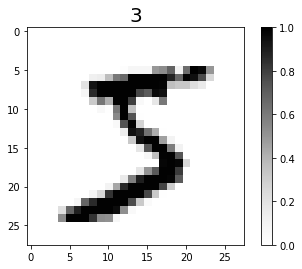

In [32]:
plt.figure()

plt.imshow(X_train[0], cmap='Greys') # image 출력, cmap : image 색상 명시
plt.colorbar() # 옆에 각 값이 나타내는 색깔을 표현
plt.title(y_train[10], fontsize=20) # 제목으로 label 값 표시
plt.show()

In [33]:
# training with 2-layer DNN

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [35]:
model_DNN_MNIST = Sequential()
model_DNN_MNIST.add(Flatten(input_shape=(28, 28))) # 1-dim으로 변환하는 layer
model_DNN_MNIST.add(Dense(64, activation='relu')) # hidden layer
model_DNN_MNIST.add(Dense(10, activation='softmax')) # output layer

In [36]:
model_DNN_MNIST.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [37]:
# training
model_DNN_MNIST.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6734 - acc: 0.8286
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3458 - acc: 0.9031
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2968 - acc: 0.9165
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2657 - acc: 0.9249
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2422 - acc: 0.9317
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2231 - acc: 0.9373
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2073 - acc: 0.9420
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1944 - acc: 0.9457
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1829 - acc: 0.9483
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1730 - acc: 0.9518
Epoch 11/100
1875/1

In [42]:
model_DNN_MNIST.predict(X_test[0]).argmax(1)

1/1 [==============================] - 0s 15ms/step


array([7])

In [43]:
model_DNN_MNIST.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - acc: 0.9760


[0.07852160930633545, 0.9760000109672546]

In [46]:
# training MNIST with Logistics Regression

In [51]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [52]:
X_train_LR = X_train.reshape((60000, -1))
X_test_LR = X_test.reshape((10000, -1))

In [54]:
X_train_LR.shape, X_test_LR.shape

((60000, 784), (10000, 784))

In [55]:
model_LR_MNIST = LogisticRegression()

In [56]:
model_LR_MNIST.fit(X_train_LR, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [57]:
model_LR_MNIST.predict(X_test_LR)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [58]:
model_LR_MNIST.score(X_test_LR, y_test)

0.9258